Euler method 1st order

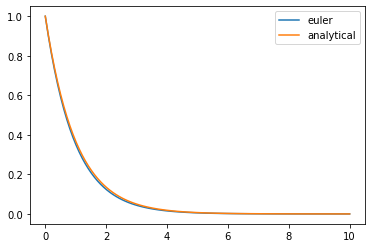

In [97]:

# f should be defined as f(t,z)
# dt is desired timestep
# z0 should be an m x 1 array of initial conditions
# n is number of points so final time would be dt * n
# for now only accepts first order ode, will expand to second order later for comparison with leapfrog
# t0 is initial time
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
def Euler(f,dt,n,z0,t0):
    tf = (dt * n)-t0          # setting the final time so we can make the time array
    f0 = f(t0,z0)             # setting f0 to the given initial conditions
    t = np.linspace(t0,tf,n)  # creates the time array
    fn = np.zeros(n)          # creates array to store values for f(z)
    zn = np.zeros(n)          # creates array to store z values 
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int):    # iterates through time to perform the numerical integration
        if i == 0:   # sets initial array values to initial conditions
            zn[i] = z0
            fn[i] = f0
        else:
            zn[i] = zn[i-1] + dt*fn[i-1] #sets next z value based on euler
            fn[i] = f(t[i],zn[i]) #sets next f(z) value
    return zn ,fn , t

Leapfrog Method 2nd order

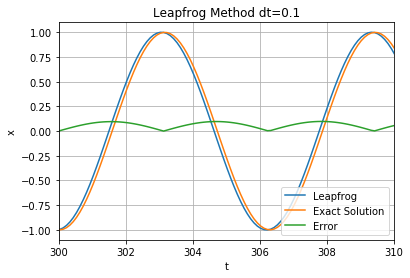

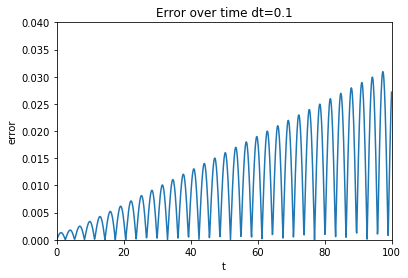

In [106]:
# f should be in the form f(t,z)
import numpy as np
import matplotlib.pyplot as plt
def leapfrog(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0       # setting the final time so we can make the time array
    t = np.linspace(t0,tf,n)     # creates the time array
    fn = np.zeros(n)       # creates array to store values for f(z)
    vn = np.zeros(n)       #  creates array to store values for v
    zn = np.zeros(n)       # creates array to store values for z
    f0 = f(t0,z0)          # setting f0 to the given initial conditions
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int): # iterates through time to perform the numerical integration
        if i == 0:     # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            zn[i] = zn[i-1] + dt*vn[i-1] + (1/2)*fn[i-1]*dt**2 #sets next z value based on leapfrog
            fn[i] = f(t[i],zn[i]) #sets next f(z) value
            vn[i] = vn[i-1] + (1/2)*(fn[i-1]+fn[i])*dt #sets next v value based on leapfrog
    return zn,fn,vn,t
def f(t,z):
    return -z
dt=0.1
n=10000
v0 = 1
z0 = 0
z1,f1,v1,t1=leapfrog(f,dt,n,z0,v0,t0)
plt.plot(t1,z1,label='Leapfrog')
x = np.sin(t1)
plt.plot(t1,x,label='Exact Solution')
plt.xlim(300,310)
Error= np.abs(x-z1)
plt.plot(t1,Error,label='Error')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Leapfrog Method dt=0.1')
plt.legend()
plt.grid()
plt.figure()
plt.plot(t1,Error)
plt.ylim(0,.04)
plt.xlim(0,100)
plt.xlabel('t')
plt.ylabel('error')
plt.title('Error over time dt=0.1')
plt.show()

RK4 1st order

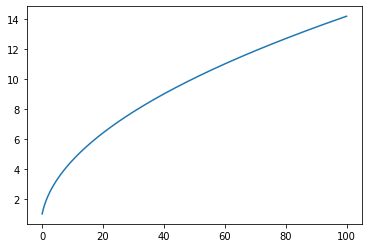

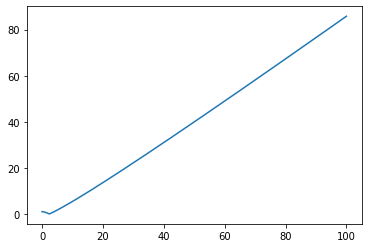

In [135]:
#expects input in the form f(t,z)
#currently only supports 1st order ode, will be expanded to 2nd later to compare with leapfrog
import matplotlib.pyplot as plt
import numpy as np
def rk(f,dt,n,z0,t0):
    tf = (dt * n)-t0        # setting the final time so we can make the time array
    t = np.linspace(t0,tf,n+1)    # creates the time array
    fn = np.zeros(n+1)     # creates array to store values for f(z)
    zn = np.zeros(n+1)    # creates array to store values for z
    f0 = f(t0,z0)        # setting f0 to the given initial conditions
    i = int(0)
    zn[0] = z0
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int): # iterates through time to perform the numerical integration
        k1 = dt*f(t[i],zn[i]) # slope at beginning of interval based on z (eulers method)
        k2 = dt*f(t[i]+(dt/2),zn[i]+(k1/2)) # slope at midpoint of interval based on z and k1
        k3 = dt*f(t[i]+(dt/2),zn[i]+(k2/2)) #slope at midpoint of interval based on z and k2
        k4 = dt*f(t[i]+dt,zn[i]+k3)     #slope at end of interval based on z and k3
        k = (k1 + 2*k2 + 2*k3 + k4)/6  #takes the weighted average of the slopes
        zn[i+1] = zn[i] + k #applies eulers method with averaged slope
    return t,zn

Euler 2nd order

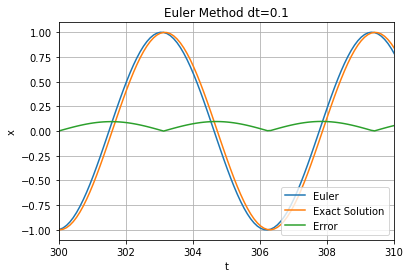

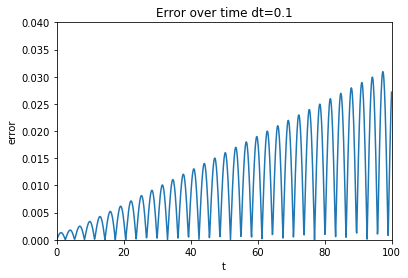

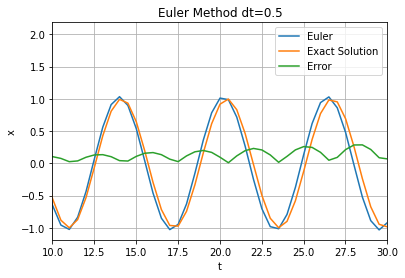

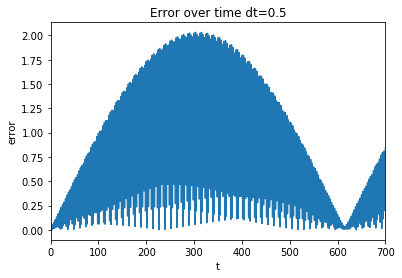

In [94]:
# f should be defined as f(t,z,v)
# dt is desired timestep
# n is number of points so final time would be dt * n
# t0 is initial time
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
def Euler(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0          # setting the final time so we can make the time array
    f0 = f(t0,z0,v0)          # setting f0 to the given initial conditions
    t = np.linspace(t0,tf,n)  # creates the time array
    fn = np.zeros(n)          # creates array to store values for f(z)
    zn = np.zeros(n)          # creates array to store z values
    vn = np.zeros(n)
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int):    # iterates through time to perform the numerical integration
        if i == 0:   # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            vn[i] = vn[i-1] + dt*fn[i-1]
            zn[i] = zn[i-1] + dt*vn[i] #sets next z value based on euler
            fn[i] = f(t[i],zn[i],vn[i]) #sets next f(z) value
    return zn, vn, fn, t
def f(t,z,v):
    
    return -z
dt = 0.1
n = 10000
tn = 100
t0 = 0
z0 = 0
v0 = 1
z1,v1,f1,t1 = Euler(f,dt,n,z0,v0,t0)
plt.plot(t1,z1,label="Euler")
x = np.sin(t1)
plt.plot(t,x,label='Exact Solution')
plt.xlim(300,310)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler Method dt=0.1')
Error = np.abs(z1-x)
plt.plot(t1,Error,label="Error")
plt.grid()
plt.legend()
plt.figure()
plt.plot(t1,Error,label="Error")
plt.xlim(0,100)
plt.ylim(0,.04)
plt.xlabel('t')
plt.ylabel('error')
plt.title('Error over time dt=0.1')

dt = .5
n = 2000
plt.figure()
z2,v2,f2,t2 = Euler(f,dt,n,z0,v0,t0)
plt.plot(t2,z2,label="Euler")
x = np.sin(t2)
plt.plot(t2,x,label='Exact Solution')
plt.xlim(10,30)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler Method dt=0.5')
Error = np.abs(z2-x)
plt.plot(t2,Error,label="Error")
plt.grid()
plt.legend()
plt.figure()
plt.plot(t2,Error,label="Error")
plt.xlim(0,700)
#plt.ylim(0,1)
plt.xlabel('t')
plt.ylabel('error')
plt.title('Error over time dt=0.5')

plt.show()

euler vs leapfrog vs rk4

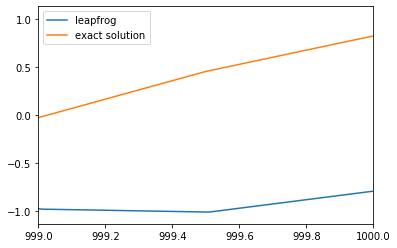

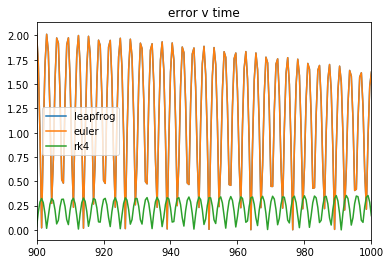

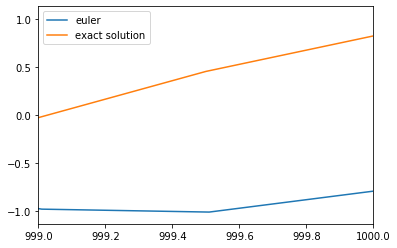

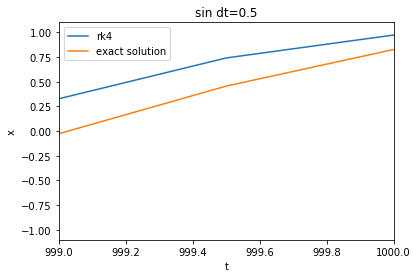

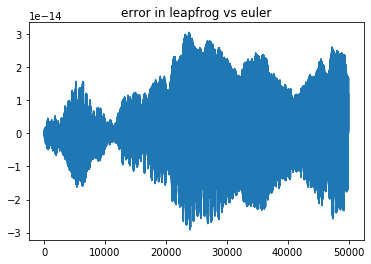

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def leapfrog(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0       # setting the final time so we can make the time array
    t = np.linspace(t0,tf,n)     # creates the time array
    fn = np.zeros(n)       # creates array to store values for f(z)
    vn = np.zeros(n)       #  creates array to store values for v
    zn = np.zeros(n)       # creates array to store values for z
    f0 = f(t0,z0)          # setting f0 to the given initial conditions
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int): # iterates through time to perform the numerical integration
        if i == 0:     # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            zn[i] = zn[i-1] + dt*vn[i-1] + (1/2)*fn[i-1]*dt**2 #sets next z value based on leapfrog
            fn[i] = f(t[i],zn[i]) #sets next f(z) value
            vn[i] = vn[i-1] + (1/2)*(fn[i-1]+fn[i])*dt #sets next v value based on leapfrog
    return zn,fn,vn,t

def Euler(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0          # setting the final time so we can make the time array
    f0 = f(t0,z0,v0)          # setting f0 to the given initial conditions
    t = np.linspace(t0,tf,n)  # creates the time array
    fn = np.zeros(n)          # creates array to store values for f(z)
    zn = np.zeros(n)          # creates array to store z values
    vn = np.zeros(n)
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int):    # iterates through time to perform the numerical integration
        if i == 0:   # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            vn[i] = vn[i-1] + dt*fn[i-1]
            zn[i] = zn[i-1] + dt*vn[i] #sets next z value based on euler
            fn[i] = f(t[i],zn[i],vn[i]) #sets next f(z) value
    return zn, vn, fn, t

def f1(t,z,v):
    return -z
def f2(t,z,v):
    return z
def f1l(t,z):
    return -z
def f2l(t,z):
    return z
def f1r(t,z):
    x,v = z
    dxdt = v
    dvdt = -x
    return dxdt,dvdt
def f2r(t,z):
    x,v = z
    dxdt = v
    dvdt = x
    return dxdt,dvdt

n = 100000
z0 = 0
v0 = 1
t0 =0
tn = 1000
dt = .5
lab = str(dt)
plt.figure(1)
zl,fl,vl,tl = leapfrog(f1l,dt,n,z0,v0,t0)
plt.plot(tl,zl,label="leapfrog")
x = np.sin(tl)
ELeapfrog = np.abs(x-zl)
plt.figure(2)
plt.plot(tl,ELeapfrog,label='leapfrog')
plt.figure(4)
ze,ve,ef,te = Euler(f1,dt,n,z0,v0,t0)
plt.plot(te,ze,label="euler")
plt.figure(2)
EEuler= np.abs(x-ze)
plt.plot(te,EEuler,label="euler")
plt.figure(5)
t = np.arange(0, tn+dt, dt)
sol = scipy.integrate.solve_ivp(f1r, (0, tn), (z0,v0), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))
plt.plot(t,sol.y[0],label="rk4")
plt.xlabel('t')
plt.ylabel('x')
plt.title('sin dt='+lab)
x = np.sin(t)
Erk4 = np.abs(x-sol.y[0])
plt.figure(2)
plt.xlim(900,1000)
plt.plot(t,Erk4,label='rk4')
plt.legend()
plt.title('error v time')
plt.figure(1)
plt.plot(t,x,label='exact solution')
plt.xlim(999,1000)
plt.legend()
plt.figure(4)
plt.plot(t,x,label='exact solution')
plt.xlim(999,1000)
plt.legend()
plt.figure(5)
plt.plot(t,x,label='exact solution')
plt.xlim(999,1000)
plt.legend()
plt.figure(3)
E = ELeapfrog-EEuler
plt.plot(tl,E)
plt.title("error in leapfrog vs euler")
plt.show()

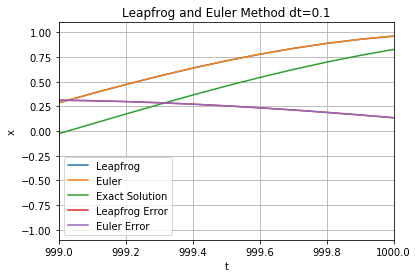

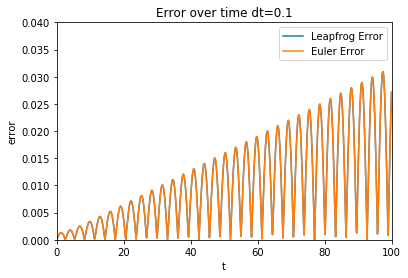

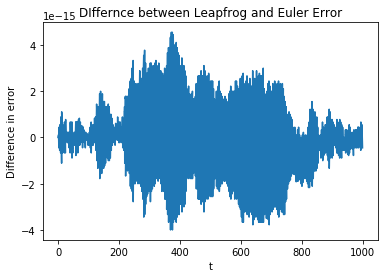

In [120]:
# f should be in the form f(t,z)
import numpy as np
import matplotlib.pyplot as plt
def leapfrog(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0       # setting the final time so we can make the time array
    t = np.linspace(t0,tf,n)     # creates the time array
    fn = np.zeros(n)       # creates array to store values for f(z)
    vn = np.zeros(n)       #  creates array to store values for v
    zn = np.zeros(n)       # creates array to store values for z
    f0 = f(t0,z0)          # setting f0 to the given initial conditions
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int): # iterates through time to perform the numerical integration
        if i == 0:     # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            zn[i] = zn[i-1] + dt*vn[i-1] + (1/2)*fn[i-1]*dt**2 #sets next z value based on leapfrog
            fn[i] = f(t[i],zn[i]) #sets next f(z) value
            vn[i] = vn[i-1] + (1/2)*(fn[i-1]+fn[i])*dt #sets next v value based on leapfrog
    return zn,fn,vn,t

def Euler(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0          # setting the final time so we can make the time array
    f0 = f(t0,z0,v0)          # setting f0 to the given initial conditions
    t = np.linspace(t0,tf,n)  # creates the time array
    fn = np.zeros(n)          # creates array to store values for f(z)
    zn = np.zeros(n)          # creates array to store z values
    vn = np.zeros(n)
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int):    # iterates through time to perform the numerical integration
        if i == 0:   # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            vn[i] = vn[i-1] + dt*fn[i-1]
            zn[i] = zn[i-1] + dt*vn[i] #sets next z value based on euler
            fn[i] = f(t[i],zn[i],vn[i]) #sets next f(z) value
    return zn, vn, fn, t
def f(t,z):
    return -z
def fe(t,z,v):
    return -z
dt=0.1
n=10000
v0 = 1
z0 = 0
z1,f1,v1,t1=leapfrog(f,dt,n,z0,v0,t0)
z2,v2,f2,t2 = Euler(fe,dt,n,z0,v0,t0)
plt.plot(t1,z1,label='Leapfrog')
plt.plot(t2,z2,label="Euler")
x = np.sin(t1)
plt.plot(t1,x,label='Exact Solution')
plt.xlim(999,1000)
ErrorL= np.abs(x-z1)
ErrorE = np.abs(z2-x)
plt.plot(t1,ErrorL,label='Leapfrog Error')
plt.plot(t2,ErrorE,label='Euler Error')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Leapfrog and Euler Method dt=0.1')
plt.legend()
plt.grid()
plt.figure()
plt.plot(t1,ErrorL,label='Leapfrog Error')
plt.plot(t2,ErrorE,label='Euler Error')
plt.legend()
plt.ylim(0,.04)
plt.xlim(0,100)
plt.xlabel('t')
plt.ylabel('error')
plt.title('Error over time dt=0.1')
plt.figure()
Edif=ErrorE-ErrorL
plt.plot(t1,Edif)
plt.xlabel('t')
plt.ylabel('Difference in error')
plt.title('DIffernce between Leapfrog and Euler Error')
plt.show()

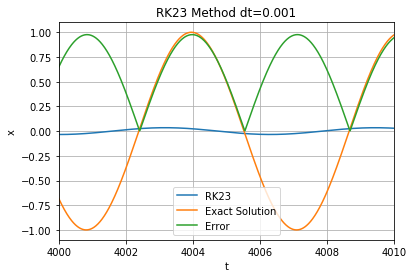

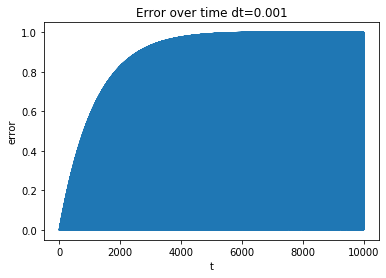

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
def f1r(t,z):
    x,v = z
    dxdt = v
    dvdt = -x
    return dxdt,dvdt
tn = 10000
dt = .01
v0 = 1
z0 = 0
t = np.arange(0, tn+dt, dt)
sol = scipy.integrate.solve_ivp(f1r, (0, tn), (z0,v0), method = 'RK23', t_eval = np.arange(0, tn+dt, dt))
x = np.sin(t)
error = np.abs(sol.y[0]-x)
plt.plot(t,sol.y[0],label="RK23")
plt.plot(t,x,label="Exact Solution")
plt.plot(t,error,label="Error")
plt.title('RK23 Method dt=0.001')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(4000,4010)
plt.grid()
plt.legend()
plt.figure()
plt.plot(t,error,label="Error")
plt.title('Error over time dt=0.001')
plt.xlabel('t')
plt.ylabel('error')
#plt.xlim(0,100)
#plt.ylim(0,0.1)
plt.show()

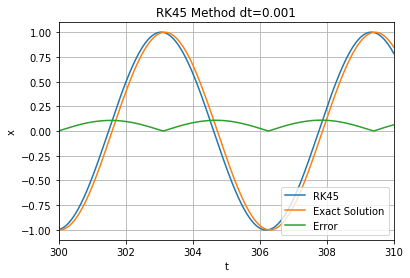

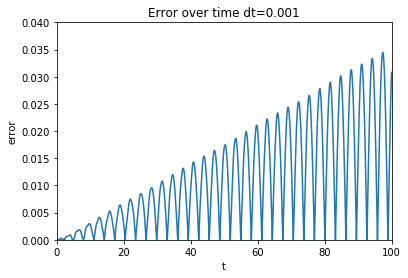

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
def f1r(t,z):
    x,v = z
    dxdt = v
    dvdt = -x
    return dxdt,dvdt
tn = 1000
dt = .001
v0 = 1
z0 = 0
t = np.arange(0, tn+dt, dt)
sol = scipy.integrate.solve_ivp(f1r, (0, tn), (z0,v0), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))
x = np.sin(t)
error = np.abs(sol.y[0]-x)
plt.plot(t,sol.y[0],label="RK45")
plt.plot(t,x,label="Exact Solution")
plt.plot(t,error,label="Error")
plt.title('RK45 Method dt=0.001')
plt.xlabel('t')
plt.ylabel('x')
plt.ylim(-1.1,1.1)
plt.xlim(300,310)
plt.grid()
plt.legend()
plt.figure()
plt.plot(t,error,label="Error")
plt.title('Error over time dt=0.001')
plt.xlabel('t')
plt.ylabel('error')
plt.xlim(0,100)
plt.ylim(0,0.04)
plt.show()

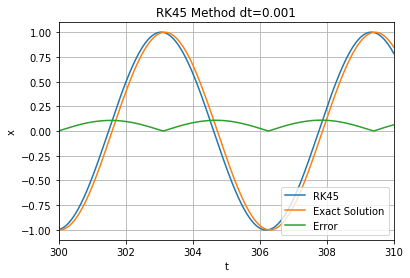

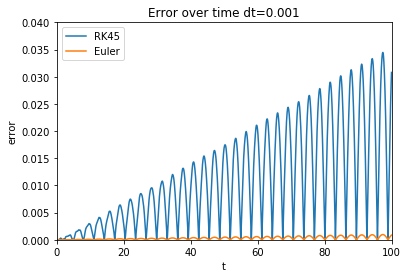

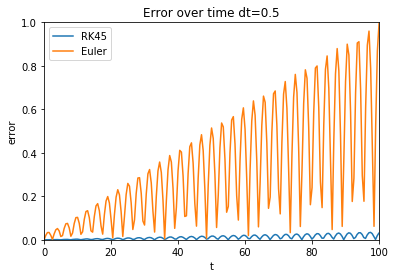

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
def Euler(f,dt,n,z0,v0,t0):
    tf = (dt * n)-t0          # setting the final time so we can make the time array
    f0 = f(t0,z0,v0)          # setting f0 to the given initial conditions
    t = np.linspace(t0,tf,n)  # creates the time array
    fn = np.zeros(n)          # creates array to store values for f(z)
    zn = np.zeros(n)          # creates array to store z values
    vn = np.zeros(n)
    i = int(0)
    for i in np.linspace(0,n-1,n,endpoint=True,retstep=False,dtype=int):    # iterates through time to perform the numerical integration
        if i == 0:   # sets initial array values to initial conditions
            zn[i] = z0
            vn[i] = v0
            fn[i] = f0
        else:
            vn[i] = vn[i-1] + dt*fn[i-1]
            zn[i] = zn[i-1] + dt*vn[i] #sets next z value based on euler
            fn[i] = f(t[i],zn[i],vn[i]) #sets next f(z) value
    return zn, vn, fn, t
def f(t,z,v):
    
    return -z
def f1r(t,z):
    x,v = z
    dxdt = v
    dvdt = -x
    return dxdt,dvdt
tn = 1000
n = 100000
dt = .001
v0 = 1
z0 = 0
t0 = 0
t = np.arange(0, tn+dt, dt)
sol = scipy.integrate.solve_ivp(f1r, (0, tn), (z0,v0), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))
x = np.sin(t)
errorR = np.abs(sol.y[0]-x)
plt.plot(t,sol.y[0],label="RK45")
plt.plot(t,x,label="Exact Solution")
plt.plot(t,errorR,label="Error")
plt.title('RK45 Method dt=0.001')
plt.xlabel('t')
plt.ylabel('x')
plt.ylim(-1.1,1.1)
plt.xlim(300,310)
plt.grid()
plt.legend()
plt.figure()
plt.plot(t,errorR,label="RK45")
plt.title('Error over time dt=0.001')
plt.xlabel('t')
plt.ylabel('error')
plt.xlim(0,100)
plt.ylim(0,0.04)

z1,v1,f1,t1 = Euler(f,dt,n,z0,v0,t0)
x1 = np.sin(t1)
ErrorE = np.abs(z1-x1)

plt.plot(t1,ErrorE,label="Euler")
plt.legend()
dt = .5
n = 2000
plt.figure()
z2,v2,f2,t2 = Euler(f,dt,n,z0,v0,t0)
x2 = np.sin(t2)

ErrorE2 = np.abs(z2-x2)

sol1 = scipy.integrate.solve_ivp(f1r, (0, tn), (z0,v0), method = 'RK45', t_eval = np.arange(0, tn+dt, dt))
t = np.arange(0, tn+dt, dt)
x = np.sin(t)
ErrorR2 = np.abs(sol1.y[0]-x)
plt.plot(t,ErrorR2,label='RK45')
plt.plot(t2,Error,label="Euler")
plt.legend()
plt.xlim(0,100)
plt.ylim(0,1)
plt.xlabel('t')
plt.ylabel('error')
plt.title('Error over time dt=0.5')

plt.show()